This is based on the APMonitor Linear Regression video but adds regression statistics such as $R^2$, $R_{adj}^2$, and confidence intervals<br>
https://apmonitor.com/che263/index.php/Main/PythonRegressionStatistics

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats.distributions import  t

data = pd.read_csv('C&S3.5data.csv')
data.head()

,Re,Pr,mu,Nu
0,49000.0,2.30,0.947,277.0
1,68600.0,2.28,0.954,348.0
2,84800.0,2.27,0.959,421.0
3,34200.0,2.32,0.943,223.0
4,22900.0,2.36,0.936,177.0


In [2]:
Re = data['Re'].values
Pr = data['Pr'].values
mu = data['mu'].values
Nu = data['Nu'].values
num = len(Nu)
print(Pr)

[   2.3     2.28    2.27    2.32    2.36  246.    247.    251.    273.
 1518.   1590.   1521.    107.4   186.    414.   1302.  ]


Regression using SciPy<br>
Regress the data with the following equation $$Nu = aRe^bPr^c  $$

In [3]:
# Define Equation for non-linear regression Nu  
def calc_y(x,a,b,c):
    y = a*Re**b*Pr**c 
    return y
# testing the function
x=[Re,Pr]
print(calc_y(x,0.66,0.5395,0.245))

[274.49095649 328.42396011 367.82380513 226.56643757 183.24773655
 122.75808556 101.74264926  74.44660592  61.12731773  53.2437653
  34.5551406   43.54937272  97.21547891  99.75714118  79.39623111
  33.16620173]


In [4]:
# calculate Nu using a non-linear regression 
params, covs = curve_fit(calc_y, x, Nu)
print("params: ", params) 
print("covariance: ", covs) 

params:  [0.16564087 0.66354798 0.34137704]
covariance:  [[ 0.00342255 -0.0017514  -0.00164042]
 [-0.0017514   0.00089794  0.00083465]
 [-0.00164042  0.00083465  0.0008292 ]]


In [5]:
params, pcov=curve_fit(calc_y,x,Nu)
a,b,c=params[0],params[1],params[2]
yfit=a*Re**b*Pr**c
print(params, pcov)
print (yfit)

[0.16564087 0.66354798 0.34137704] [[ 0.00342255 -0.0017514  -0.00164042]
 [-0.0017514   0.00089794  0.00083465]
 [-0.00164042  0.00083465  0.0008292 ]]
[284.98578828 355.21502393 408.25701447 225.15446372 173.5525962
 127.71637928 101.39577416  69.0953833   54.40217956  49.1698134
  28.94525257  38.40396383  92.73068546  97.84982489  76.30172164
  27.3016249 ]


In [9]:
alpha = 0.05 # 95% confidence interval = 100*(1-alpha)

n = len(Re)    # number of data points
p = len(params) # number of parameters

dof = max(0, n - p) # number of degrees of freedom

# student-t value for the dof and confidence level
tval = t.ppf(1.0-alpha/2., dof) 
print('    Parameter  +/- 95% confidence  [lower 95%   upper 95%]')
for i, p,var in zip(range(n), params, np.diag(pcov)):
    sigma = var**0.5
    
    print ('p{:d}: {:7.5f} +/- {:7.5f}       [{:7.5f}  {:7.5f}]'.format(i, p,sigma*tval,p - sigma*tval,p + sigma*tval))


    Parameter  +/- 95% confidence  [lower 95%   upper 95%]
p0: 0.16564 +/- 0.12639       [0.03925  0.29203]
p1: 0.66355 +/- 0.06474       [0.59881  0.72828]
p2: 0.34138 +/- 0.06221       [0.27917  0.40359]


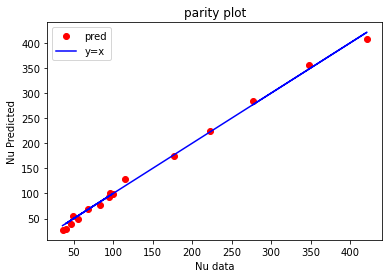

In [10]:
xplot=np.linspace(30,450,20)
# plot solution
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(Nu,yfit,'ro',label='pred')
plt.plot(Nu,Nu,'-b',label='y=x');
plt.xlabel('Nu data')
plt.ylabel('Nu Predicted')
plt.title('parity plot')
plt.legend(loc='best')


In [11]:
residuals = yfit-Nu
ss_res = np.sum(residuals**2)
variance=ss_res/(len(Nu)-len(params))
print('variance={:7.5}'.format(variance))

variance= 68.276


In [12]:
residuals = yfit-Nu
ss_res = np.sum(residuals**2)
ss_tot = np.sum((Nu-np.mean(Nu))**2)
r_squared = 1 - (ss_res/ss_tot)
r_squared
print('r^2={:7.5}'.format(r_squared))

r^2=0.99575


Regression using SciPy<br>
Regress the data with the following equation $$Nu = a1Re^{b1}Pr^{c1}mu^{d1}  $$

In [ ]:
# calculate Nu using a non-linear regression 
def calc_y1(x1,a1,b1,c1,d1):
    y1 = a1*Re**b1*Pr**c1*mu**d1 
    return y1
x1=[Re,Pr,mu]
print(calc_y1(x1,0.149,0.673,0.329,-0.1774))

In [ ]:
# calculate Nu using a non-linear regression 
params1, covs1 = curve_fit(calc_y1, x1, Nu)
print("params: ", params1) 
print("covariance: ", covs1) 

In [ ]:
params1, pcov1=curve_fit(calc_y1,x1,Nu)
a1,b1,c1,d1=params1[0],params1[1],params1[2],params1[3]
yfit1=a1*Re**b1*Pr**c1*mu**d1
print(params1, pcov1)
print (yfit1)

In [ ]:
# print solution
print('Solution with dimensionless viscosity ratio')

print('a = {:7.5} +/- {:7.5}'.format(params1[0],pcov1[0,0]**0.5))
print('b = {:7.5} +/- {:7.5}'.format(params1[1],pcov1[1,1]**0.5))
print('c = {:7.5} +/- {:7.5}'.format(params1[2],pcov1[2,2]**0.5))

xplot=np.linspace(30,450,20)
# plot solution
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(Nu,yfit1,'ro',label='pred')
plt.plot(Nu,Nu,'-b',label='y=x');
plt.xlabel('Nu data')
plt.ylabel('Nu Predicted')
plt.title('parity plot for the viscosity correction')
plt.legend(loc='best')


In [ ]:
residuals1 = yfit1-Nu
ss_res1 = np.sum(residuals1**2)
variance1=ss_res1/(len(Nu)-len(params1))
variance1

In [ ]:
residuals = yfit1-Nu
ss_res = np.sum(residuals**2)
ss_tot = np.sum((Nu-np.mean(Nu))**2)
r_squared = 1 - (ss_res/ss_tot)
r_squared
print('r^2={:7.5}'.format(r_squared))

In [ ]:
#The variable of viscosity is not independent of the Reynolds number

xplot=np.linspace(30,450,20)
# plot solution
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(np.log(Re),mu,'ro',label='data')

plt.xlabel('ln(Re)')
plt.ylabel('Mu')
plt.title('Demonstration that mu and Re are not independent')
plt.legend(loc='best')


As can be seen in the graph above the values of viscosity and Reynolds number are not independent.  So it is recomended that the 3 parameter model is the best fit.  The regression with the lowest variance is from the non-linear fit.  $$Nu = aRe^bPr^c  $$ which is $$Nu = 0.16564Re^{0.66355}Pr^{0.34138}  $$

In [ ]:
print('Nu={:7.5}Re^({:7.5})Pr^({:7.5}) '.format(params[0],params[1],params[2]))
